In [1]:
import sys
sys.path.append("/home/wbc/code/HMcode-python/hmcode/pyhalomodel")
from pyhalomodel import pyhalomodel as hm
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/home/wbc/code/HMcode-python/hmcode/CAMELSconcentration")
from Interpolator import CvirModel, avail_sims
sys.path.append("/home/wbc/code/HMcode-python/hmcode/cmnew")
from cmnew import c_m_correct

In [2]:
M = np.logspace(8,16,80)

In [3]:
Mvir = 10**np.linspace(11, 14.5, 50) #in units of Msun/h

model = CvirModel(sim = 'DMO') #This loads + organizes the model parameters (KLLR slopes/intercepts)
mean  = model.predict(Mvir, z = 0, Omega_m = 0.3, sigma_8 = 0.85, SN1 = 1, AGN1 = 1, SN2 = 1, AGN2 = 1)
mean = np.mean(mean, axis = 0)

model2 = CvirModel(sim = 'TNG') #This loads + organizes the model parameters (KLLR slopes/intercepts)
mean2 = model2.predict(Mvir, z = 0, Omega_m = 0.3, sigma_8 = 0.85, SN1 = 1, AGN1 = 1, SN2 = 1, AGN2 = 1)
mean2 = np.mean(mean2, axis = 0)

In [4]:
c_ = mean
c__ = mean2

In [5]:
c_correct = c_m_correct.c_correct(M, z = 0, om = 0.3, s8 = 0.85, sn1=1, agn1=1, sn2=1, agn2=1)
c_correct2 = c_m_correct.c_correct(M, z = 0, sim='TNG', om = 0.3, s8 = 0.85, sn1=1, agn1=1, sn2=1, agn2=1)

In [6]:
def _concentration_Duffy(M: np.ndarray, z: float, halo_definition='M200') -> np.ndarray:
    '''
    Duffy et al (2008; 0804.2486) c(M) relation for WMAP5, See Table 1
    Appropriate for the full (rather than relaxed) samples
    '''
    M_piv = 2e12  # Pivot mass [Msun/h]
    if halo_definition in ['M200', '200', '200b']:
        A = 10.14
        B = -0.081
        C = -1.01
    elif halo_definition in ['vir', 'virial', 'Mvir']:
        A = 7.85
        B = -0.081
        C = -0.71
    elif halo_definition in ['M200c', '200c']:
        A = 5.71
        B = -0.084
        C = -0.47
    else:
        raise ValueError('Halo definition not recognised')
    return A*(M/M_piv)**B*(1.+z)**C  # Equation (4) in 0804.2486

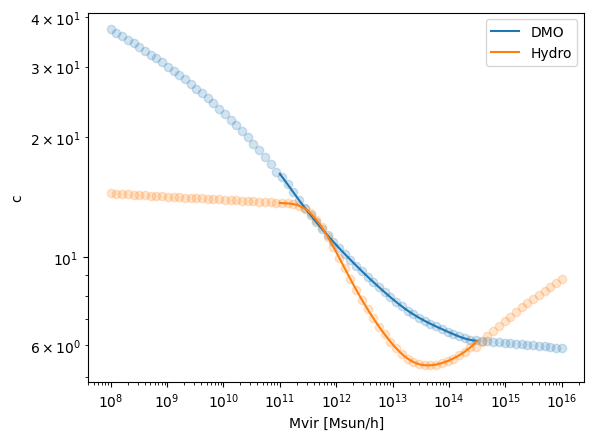

In [15]:
#plt.plot(M,c)
plt.scatter(M,c_correct, alpha=0.2)
plt.scatter(M, c_correct2, alpha=0.2)
plt.plot(Mvir,c_, label='DMO')
plt.plot(Mvir,c__, label='Hydro')
#plt.plot(M, _concentration_Duffy(M, z = 0, halo_definition='200c'))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mvir [Msun/h]')
plt.ylabel('c')
plt.legend()
plt.show()

In [8]:
slope_ = [(c__[i+1]-c__[i])/(np.log10(Mvir[i+1])-np.log10(Mvir[i])) for i in range(len(c_)-1)]

In [9]:
slope_slope_ = [(slope_[i+1]-slope_[i])/(np.log10(Mvir[i+1])-np.log10(Mvir[i])) for i in range(len(slope_)-1)]

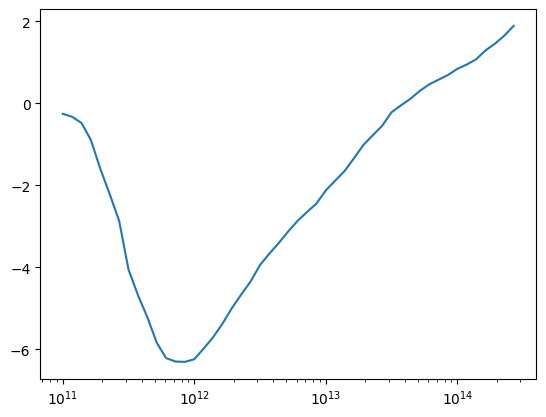

In [10]:
plt.plot(Mvir[:-1], slope_)
plt.xscale('log')

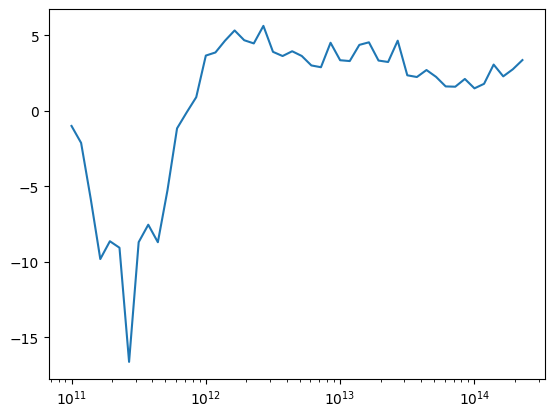

In [11]:
plt.plot(Mvir[:-2], slope_slope_)
plt.xscale('log')

In [12]:
len(Mvir)-len(slope_slope_)

2

In [13]:
mask = np.array(slope_slope_) >= 0
Mvir[1:-1][mask]

array([1.00000000e+12, 1.17876863e+12, 1.38949549e+12, 1.63789371e+12,
       1.93069773e+12, 2.27584593e+12, 2.68269580e+12, 3.16227766e+12,
       3.72759372e+12, 4.39397056e+12, 5.17947468e+12, 6.10540230e+12,
       7.19685673e+12, 8.48342898e+12, 1.00000000e+13, 1.17876863e+13,
       1.38949549e+13, 1.63789371e+13, 1.93069773e+13, 2.27584593e+13,
       2.68269580e+13, 3.16227766e+13, 3.72759372e+13, 4.39397056e+13,
       5.17947468e+13, 6.10540230e+13, 7.19685673e+13, 8.48342898e+13,
       1.00000000e+14, 1.17876863e+14, 1.38949549e+14, 1.63789371e+14,
       1.93069773e+14, 2.27584593e+14, 2.68269580e+14])